In [2]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from tabulate import tabulate
from brokenaxes import brokenaxes

## Fig 2

### Fig 2A
Bias Distribution of permutated ASD and Siblings

In [3]:
def LoadBiasData2(Real_Bias, Sim_dir):
    #ASD_Bias = pd.read_csv(ASD_Bias, index_col="STR")
    ASD_STR_Biases = {}
    for STR, row in Real_Bias.iterrows():
        ASD_STR_Biases[STR] = STRBias(STR, row["EFFECT"], row["Rank"])     
            
    biases_match_rank = {}
    biases_match_STR = {}
    for file in os.listdir(Sim_dir):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(Sim_dir+file, index_col="STR")
        for STR, row in df.iterrows():
            if STR not in biases_match_STR:
                biases_match_STR[STR] = []
            biases_match_STR[STR].append(row["EFFECT"])
            if row["Rank"] not in biases_match_rank:
                biases_match_rank[row["Rank"]] = []
            biases_match_rank[row["Rank"]].append(row["EFFECT"])
    return ASD_STR_Biases, biases_match_rank, biases_match_STR

In [8]:
def CI(simulations, p):
    simulations = sorted(simulations, reverse=False)
    n = len(simulations)
    u_pval = (1+p)/2.
    l_pval = (1-u_pval)
    l_indx = int(np.floor(n*l_pval))
    u_indx = int(np.floor(n*u_pval))
    return(simulations[l_indx],simulations[u_indx])

class STRBias:
    def __init__(self, STR, Bias, Rank):
        self.STR = STR
        self.Bias = Bias
        self.Rank = Rank
        self.Boots = []
    def GetCI(self, p):
        return CI(self.Boots, p)

In [9]:
Sib_LGD_Dmis_Bias_DF = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
Sib_Sim_Dir = "dat/SimulateControlBiasDefault/"
Sib_Z2_Bias, Sib_Sim_Bias_Rank, Sib_Sim_Bias_STR = LoadBiasData2(
    Sib_LGD_Dmis_Bias_DF, Sib_Sim_Dir)

# ASD Z2 and 61 Rand Genes
ASD_Bias = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
#ASD_Boot_Dir = "dat/Bootstrap_Match/asd.boot.bias.z2/"
ASD_Sim_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
ASD_Z2_Bias, ASD_Z2_Match_Bias_Rank, ASD_Z2_Sim_Bias_STR = LoadBiasData2(
    ASD_Bias, ASD_Sim_dir)

In [10]:
# ASD bootstraped biases
biases_asd_boot = []
asd_boot_dir = "dat/asd.boot.spec/"
for file in os.listdir(asd_boot_dir):
    df = pd.read_csv(asd_boot_dir+file, index_col="STR")
    biases_asd_boot.append(np.mean([abs(x) for x in df["EFFECT"].values]))

FileNotFoundError: [Errno 2] No such file or directory: 'dat/asd.boot.spec/'

In [ ]:
# Sibling bootstraped biases
biases_sib_boot = []
sib_boot_dir = "dat/asd.sib.boot.bias/"
for file in os.listdir(sib_boot_dir):
    df = pd.read_csv(sib_boot_dir+file, index_col="STR")
    biases_sib_boot.append(np.mean([abs(x) for x in df["EFFECT"].values]))

In [ ]:
SparkMetaBias = pd.read_csv("dat/bias2/ASD.Meta.Spec.bias.csv", index_col="STR")

bias_asd = np.mean([abs(x) for x in SparkMetaBias["EFFECT"].values])
bias_sib = np.mean([abs(x) for x in SibBias["EFFECT"].values])

In [ ]:
### V2

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, dpi=720, figsize=(6,4))
plt.style.use('seaborn-talk') # nice and clean grid

ax.hist(biases_sib_boot, density=1, color="orange", label = "Bootstrapped Sibling Bias", edgecolor='black', 
                    alpha=0.5, linewidth=0.5)
ax2.hist(biases_asd_boot, density=1, color="blue", label = "Bootstrapped Proband Bias", edgecolor='black', 
                    alpha=0.5, linewidth=0.5)

ax.vlines(x=bias_sib, ymin=0, ymax=77, color="darkorange", label="Sibling Bias")
ax2.vlines(x=bias_asd, ymin=0, ymax=45, color="darkblue", label="Proband Bias")

handles, labels = [(a + b) for a, b in zip(ax.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.35, 0.5, 0.5), fontsize=10)

ax.set_xlim((0, 0.075))  
ax2.set_xlim((0.175, 0.275))  
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax.yaxis.tick_right()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.yaxis.tick_right()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)        # top-left diagonal
ax.plot((1-d, 1+d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal

#ax.set_xlabel("Mean Absolute Expression Bias")
fig.text(0.5, -0.01, 'Mean Absolute Expression Bias', ha='center', size=16)
ax.set_ylabel("Frequency")
ax.grid(False)
plt.tight_layout()
plt.savefig("figs/Fig_2.a.pdf")

#### Fig 2A sup

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=480)


for i, (Rank, data) in enumerate(sorted(Sib_Sim_Bias_Rank.items(), key=lambda x:x[0])):
    upper, lower = CI(data, 0.95)
    ax.hlines(i+1 , lower, upper, color = "orange", lw=1)
    x3 = ax.scatter(np.mean(data), i+1, marker=".", s=7, color="orange")
for i, (STR, STR_bias) in enumerate(sorted(Sib_Z2_Bias.items(), key=lambda x:x[1].Rank)):
    x1 = ax.scatter(STR_bias.Bias, i+1, marker="^", s=5, color="darkorange")

for i, (Rank, data) in enumerate(sorted(ASD_Z2_Match_Bias_Rank.items(), key=lambda x:x[0])):
    upper, lower = CI(data, 0.95)
    ax.hlines(i+1 , lower, upper, color = "lightblue", lw=1)
    x4 = ax.scatter(np.mean(data), i+1, marker=".", s=7, color="lightblue")
for i, (STR, STR_bias) in enumerate(sorted(ASD_Z2_Bias.items(), key=lambda x:x[1].Rank)):
    x2 = ax.scatter(STR_bias.Bias, i+1, marker="^", s=5, color="darkblue")
    
plt.gca().invert_yaxis()
lgnd = ax.legend([x2, x4, x1, x3], 
                 ["Proband Bias", "Sim Proband Bias", "Sibling Bias", "Sim Sibling Bias"], 
                 prop={'size': 12}, loc="lower right")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]
plt.ylim(100, 0)
plt.xlim(-0.2, 0.8)
#plt.title(title)
plt.xlabel("Expression Bias")
plt.ylabel("Structure Rank")
plt.grid(True)
plt.savefig("figs/Figure2.pdf")

In [ ]:
def getBiasesBySTR(STR, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[STR, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases
def getBiasesByRank(Rank, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[Rank, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases

In [ ]:
# ASD-match
ASD_Sim_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
match_dfs = []
for file in os.listdir(ASD_Sim_dir):
    df = pd.read_csv(ASD_Sim_dir+file, index_col="STR")
    match_dfs.append(df)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=480)
i = 0
for STR, row in ASD_Bias.iterrows():
    mat_bias = getBiasesBySTR(STR, match_dfs)
    mean = np.mean(mat_bias)
    var = np.std(mat_bias)
    #upper, lower = CI(mat_bias, 0.95)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ax.hlines(i+1 , mean-var, mean+var, color = "lightblue", lw=1)
    x3 = ax.scatter(np.mean(mat_bias), i+1, marker=".", s=7, color="lightblue")
    x1 = ax.scatter(row["EFFECT"], i+1, marker="^", s=5, color="darkblue")
    
    i += 1
    ASD_Bias.loc[STR, "Pvalue"] = P
    ASD_Bias.loc[STR, "Z_Match"] = Z

plt.gca().invert_yaxis()
lgnd = ax.legend([x3, x1], 
                 ["Sim Proband Bias of same STR", "Proband Bias"], 
                 prop={'size': 12}, loc="lower right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.xlabel("Expression Bias")
plt.ylabel("Structure Rank")
plt.grid(True)
plt.savefig("figs/Figure2.pdf")

In [ ]:
ASD_Bias.head(50)

In [ ]:
STR = "Mediodorsal_nucleus_of_thalamus"
mat_bias = getBiasesBySTR(STR, match_dfs)
bias = ASD_Bias.loc[STR, "EFFECT"]
fig, ax = plt.subplots()
PlotPermutationP(mat_bias, bias, ax)

In [ ]:
#Sib_LGD_Dmis_Bias_DF = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
#Sib_Sim_Dir = "dat/SimulateControlBiasDefault/"

In [94]:
# ASD-match
Sib_Sim_Dir = "dat/SimulateControlBiasDefault/"
sib_sim_dfs = []
for file in os.listdir(Sib_Sim_Dir):
    if file.startswith("cont.bias"):
        df = pd.read_csv(Sib_Sim_Dir+file, index_col="STR")
        sib_sim_dfs.append(df)

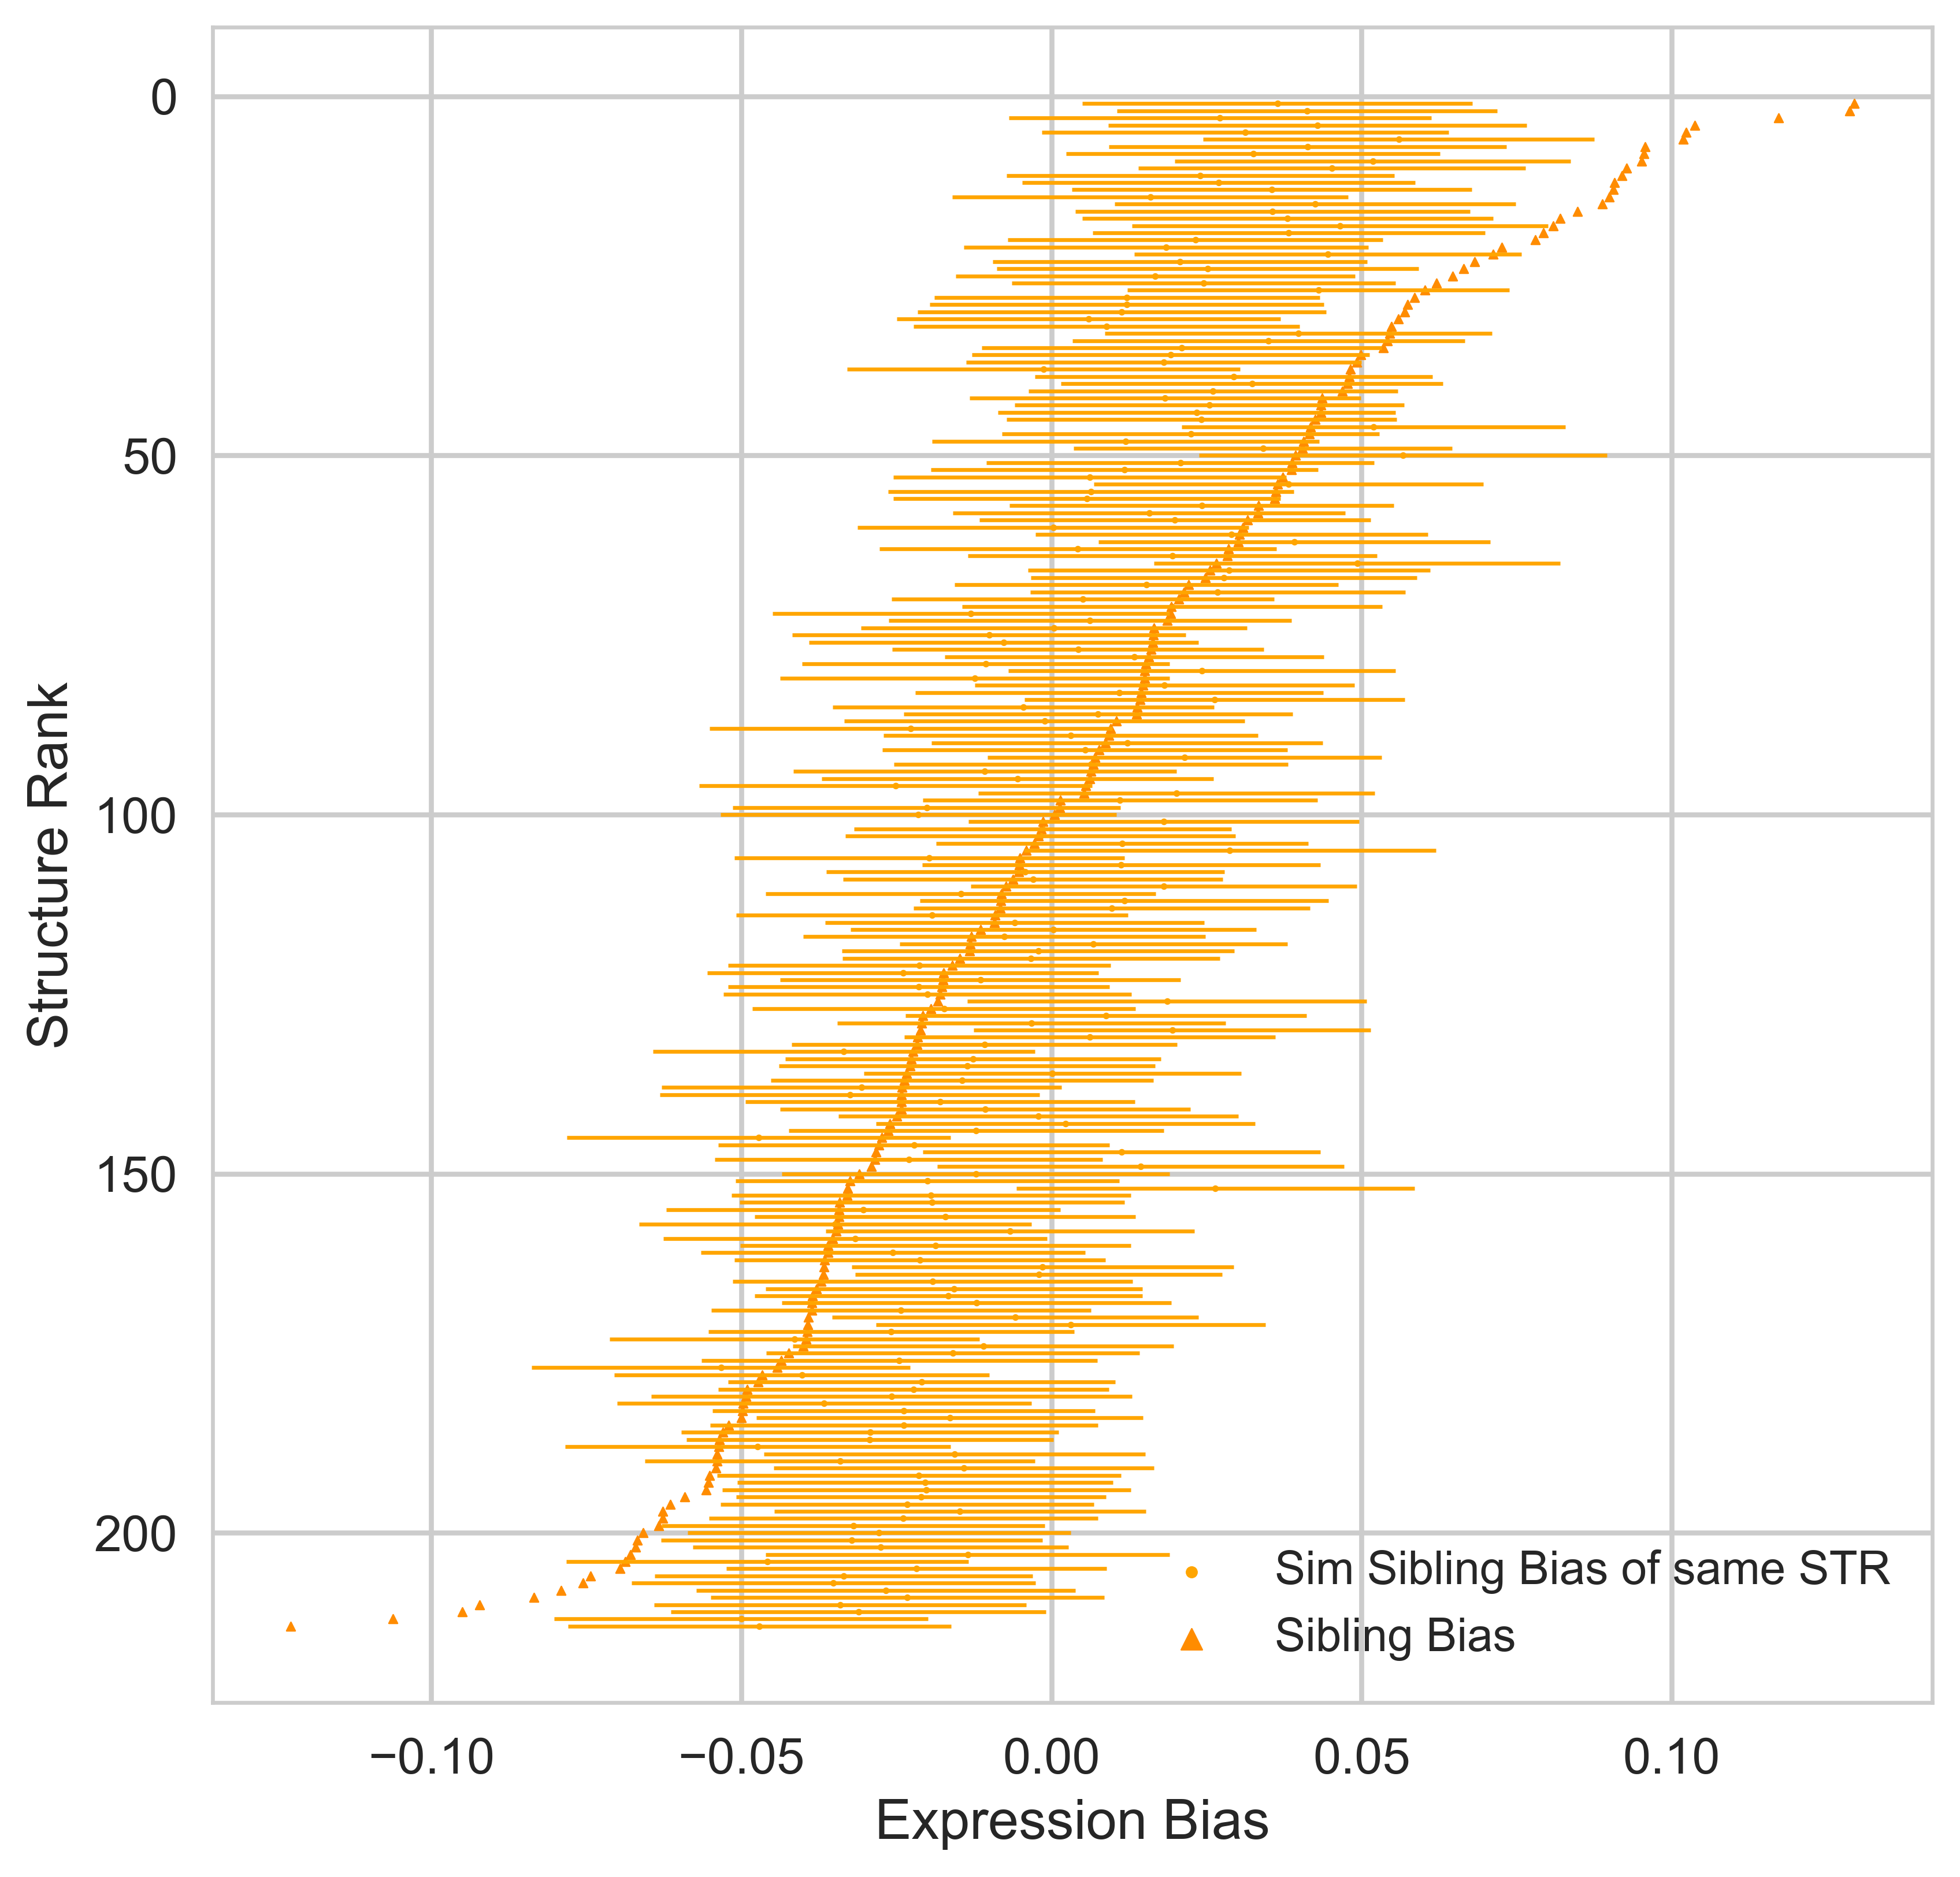

In [96]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=480)
i = 0
for STR, row in Sib_LGD_Dmis_Bias_DF.iterrows():
    mat_bias = getBiasesBySTR(STR, sib_sim_dfs)
    mean = np.mean(mat_bias)
    var = np.std(mat_bias)
    #upper, lower = CI(mat_bias, 0.95)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ax.hlines(i+1 , mean-var, mean+var, color = "orange", lw=1)
    x3 = ax.scatter(np.mean(mat_bias), i+1, marker=".", s=7, color="orange")
    x1 = ax.scatter(row["EFFECT"], i+1, marker="^", s=5, color="darkorange")
    
    i += 1
    Sib_LGD_Dmis_Bias_DF.loc[STR, "Pvalue"] = P
    Sib_LGD_Dmis_Bias_DF.loc[STR, "Z_Match"] = Z

plt.gca().invert_yaxis()
lgnd = ax.legend([x3, x1], 
                 ["Sim Sibling Bias of same STR", "Sibling Bias"], 
                 prop={'size': 12}, loc="lower right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.xlabel("Expression Bias")
plt.ylabel("Structure Rank")
plt.grid(True)
plt.savefig("figs/Figure2.pdf")

In [98]:
Sib_LGD_Dmis_Bias_DF.head(50)

,EFFECT,REGION,Rank,Pvalue,Z_Match
STR,,,,,
Posterior_limiting_nucleus_of_the_thalamus,0.129408,Thalamus,1,0.002997,2.955067
Anterior_pretectal_nucleus,0.128708,Midbrain,2,0.003996,2.854689
Lateral_dorsal_nucleus_of_thalamus,0.117249,Thalamus,3,0.004995,2.644382
Lateral_posterior_nucleus_of_the_thalamus,0.103705,Thalamus,4,0.036963,1.803178
Rhomboid_nucleus,0.102324,Thalamus,5,0.016983,2.169878
Lateral_septal_nucleus_rostral_rostroventral_part,0.101827,Striatum,6,0.076923,1.453782
Intermediodorsal_nucleus_of_the_thalamus,0.095745,Thalamus,7,0.055944,1.700615
Nucleus_of_reuniens,0.095545,Thalamus,8,0.013986,2.091447
Paraventricular_nucleus_of_the_thalamus,0.095161,Thalamus,9,0.094905,1.358890


In [194]:
xx = ASD_Bias_avgz.sort_values("Z_Match",ascending=False)

In [196]:
#xx.head(50).index.values
RegionDistributionsList(xx.head(50).index.values)

Striatum 	 4 	 Nucleus_accumbens; Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Caudoputamen
Thalamus 	 8 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Parafascicular_nucleus; Rhomboid_nucleus; Submedial_nucleus_of_the_thalamus; Subparafascicular_nucleus_magnocellular_part
Pons 	 1 	 Superior_central_nucleus_raphe
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Dorsal_peduncular_area; Piriform_area
Cortical_subplate 	 3 	 Endopiriform_nucleus_dorsal_part; Claustrum; Endopiriform_nucleus_ventral_part
Isocortex 	 20 	 Prelimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anteromedial_visual_area; Primary_visual_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_lower_limb; Infralimbic_area; Visceral_area; Primary_motor_area; Frontal_pole_cerebral_cortex; Agranular_insular_area_posterior_part; Posterior_parietal_association_ar

#### Fig 2B 
Edge Permutation with Degree and Same region membership preservation 

In [277]:
topNs = np.arange(200, 10, -10)
adj_mat = pd.read_csv(ConnFil, index_col=0)
graph = LoadConnectome2()
ASD_Bias = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
Sib_Bias = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
str2reg, reg2str = LoadSTR2REG()

ASD_Region, Sib_Region = [], []
for topN in topNs:
    ASD_Cohe, _ = ScoreSTRSet(graph, ASD_Bias.index.values[:topN])
    Sib_Cohe, _ = ScoreSTRSet(graph, Sib_Bias.index.values[:topN])

    ASD_Region.append(ASD_Cohe)
    Sib_Region.append(Sib_Cohe)

ASD_Region = np.array(ASD_Region)
Sib_Region = np.array(Sib_Region)

In [278]:
ASD_Region_Permut = []
Sib_Region_Permut = []

Region_DIR = "dat/TopN_Cohe_EdgePermutation/RegionPreserve/"
for file in os.listdir(Region_DIR):
    if file.startswith("ASD_Region_Permut"):
        array = np.load(Region_DIR+file)
        ASD_Region_Permut.append(array)
    elif file.startswith("Sib_Region_Permut"):
        array = np.load(Region_DIR+file)
        Sib_Region_Permut.append(array)
ASD_Region_Permut = np.concatenate(ASD_Region_Permut, axis=0)
Sib_Region_Permut = np.concatenate(Sib_Region_Permut, axis=0)

In [279]:
ASD_Avg_Profile = ASD_Region/ASD_Region_Permut.mean(axis=0)
Sib_Avg_Profile = Sib_Region/Sib_Region_Permut.mean(axis=0)

In [283]:
ASD_Region_Permut.shape

(10000, 19)

In [289]:
xx = ASD_Region/ASD_Region_Permut
asd_err = xx.std(axis=0)
yy = Sib_Region/Sib_Region_Permut
sib_err = yy.std(axis=0)

In [287]:
xx.std(axis=0)

array([0.00172829, 0.00234539, 0.0030227 , 0.00403423, 0.00563027,
       0.00742958, 0.00904694, 0.01059116, 0.01276939, 0.01498936,
       0.0173067 , 0.0205171 , 0.02585526, 0.03242836, 0.03857817,
       0.05538975, 0.06295003, 0.0920532 , 0.13323791])

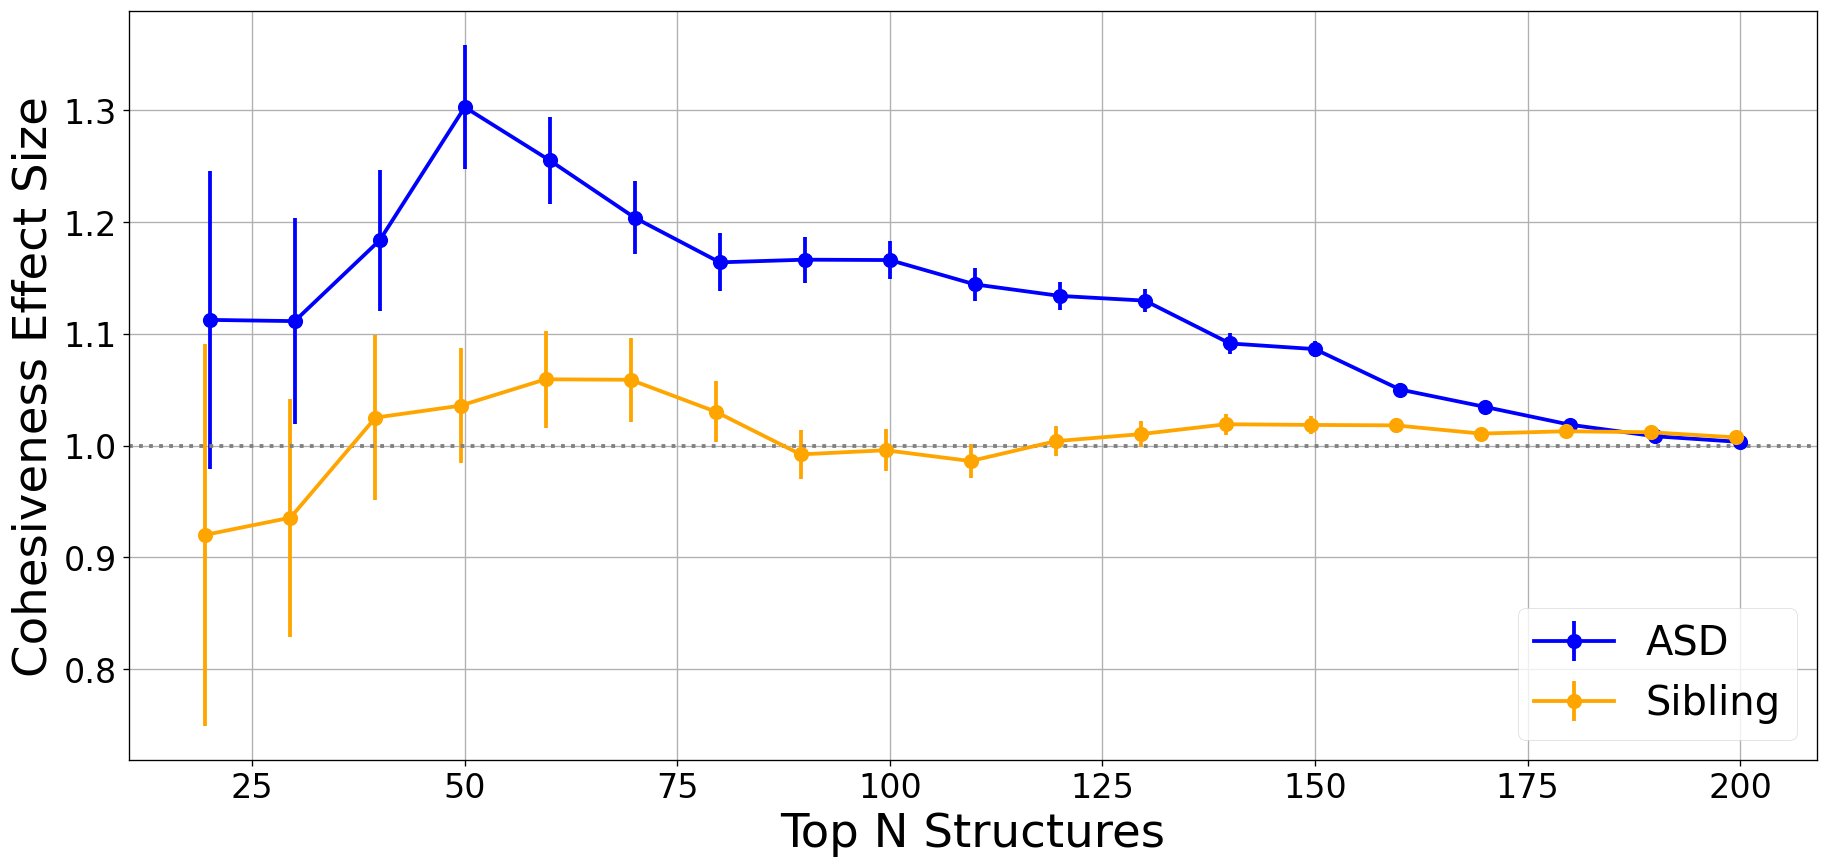

<Figure size 1040x715 with 0 Axes>

In [330]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(dpi=120, figsize=(16,8))
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 32})

#ax.plot(topNs, ASD_Avg_Profile, label="ASD", marker="o", color="blue", ls="solid")
#ax.plot(topNs, Sib_Avg_Profile, label="Sib",marker="o", color="orange", ls="solid")
ax.errorbar(topNs, ASD_Avg_Profile, yerr=asd_err, label="ASD", marker="o", 
            color="blue", ls="solid")
ax.errorbar(topNs - 0.5, Sib_Avg_Profile, yerr=sib_err, label="Sibling", marker="o", 
            color="orange", ls="solid")
plt.axhline(y=1, color='gray', linestyle='dotted')
ax.legend(fontsize=24, loc="lower right")
ax.set_ylabel("Cohesiveness Effect Size",fontsize=28)
ax.set_xlabel("Top N Structures",fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
plt.tight_layout()
#plt.title("Edge_perm_profile_Region_local_distal")
plt.show()
plt.savefig("figs/Fig3.pdf")

In [338]:
max(Sib_Avg_Profile)

1.0592435305784922

## Fig 3

In [21]:
Cartesian_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Exp_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                                   index_col="ROW")

In [ ]:
SparkMetaBias = 

In [22]:
# Annotate graph
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()
#Cartesian_distances

g2 = subgraph(g, SparkMetaBias.head(50).index.values)

# Annotate Region to Node
for i, node in enumerate(g2.vs):
    label_ = g2.vs[i]["label"]
    g2.vs[i]["Region"] = str2reg[label_]
    g2.vs[i]["Bias"] = SparkMetaBias.loc[label_, "EFFECT"]
    g2.vs[i]["Bias_Rank"] = SparkMetaBias.loc[label_, "Rank"]
    g2.vs[i]["Core_Circuit"] = label_ in Circuit_STRs

# Annotate Edge with 1.+= Cross Region; 2. Cartesin Distance; 3. Expression pho
for i, e in enumerate(g2.es):
    src_idx = e.source
    tgt_idx = e.target
    src_name = g2.vs(src_idx)["label"][0]
    tgt_name = g2.vs(tgt_idx)["label"][0]
    if g2.vs(src_idx)["Region"] == g2.vs(tgt_idx)["Region"]:
        g2.es[i]["Region"] = "within"
    else:
        g2.es[i]["Region"] = "across"
    g2.es[i]["Cartesian_dist"] = Cartesian_distances.loc[src_name, tgt_name]
    g2.es[i]["Expression_dist"] = Exp_distances.loc[src_name, tgt_name]
    
g2.write_gml("spark_meta_circuit.gml")

NameError: name 'SparkMetaBias' is not defined

In [310]:
##dir(g2.vs.select(label="Nucleus_accumbens")[0])

In [324]:
g2.vs.select(label="Nucleus_of_reuniens")[0].predecessors()

[igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 0, {'label': 'Anterior_cingulate_area_dorsal_part', 'Region': 'Isocortex', 'Bias': 0.2900775972375872, 'Bias_Rank': 29, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 5, {'label': 'Accessory_olfactory_bulb', 'Region': 'Olfactory_areas', 'Bias': 0.331158292046405, 'Bias_Rank': 17, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 15, {'label': 'Claustrum', 'Region': 'Cortical_subplate', 'Bias': 0.3242871394053688, 'Bias_Rank': 20, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 24, {'label': 'Infralimbic_area', 'Region': 'Isocortex', 'Bias': 0.3815705165714621, 'Bias_Rank': 8, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 37, {'label': 'Prelimbic_area', 'Region': 'Isocortex', 'Bias': 0.4026126802670569, 'Bias_Rank': 4, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 43, {'label': 'Subiculum_

In [325]:
g2.vs.select(label="Nucleus_of_reuniens")[0].successors()

[igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 0, {'label': 'Anterior_cingulate_area_dorsal_part', 'Region': 'Isocortex', 'Bias': 0.2900775972375872, 'Bias_Rank': 29, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 1, {'label': 'Anterior_cingulate_area_ventral_part', 'Region': 'Isocortex', 'Bias': 0.2372916285004755, 'Bias_Rank': 46, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 2, {'label': 'Nucleus_accumbens', 'Region': 'Striatum', 'Bias': 0.3647362267383864, 'Bias_Rank': 11, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 3, {'label': 'Agranular_insular_area_posterior_part', 'Region': 'Isocortex', 'Bias': 0.2475712400244004, 'Bias_Rank': 42, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph object at 0x12a2006d8>, 4, {'label': 'Agranular_insular_area_ventral_part', 'Region': 'Isocortex', 'Bias': 0.3010389351965387, 'Bias_Rank': 23, 'Core_Circuit': True}),
 igraph.Vertex(<igraph.Graph ob

## Fig 4

#### Fig 4A
ASD circuits are full of Long distance connections

In [11]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

In [31]:
#Circuit_STRs = pd.read_csv("dat/Circuit_GN_42.csv")["STR"].values
Circuit_STRs = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv").head(50)["STR"].values
Sib_STRs = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv").head(50)["STR"].values

In [32]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
graph = LoadConnectome2()

Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distancesDF, cutoff=0)
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 6000, 100000]
Dist_cut_graphs = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)
    
#ASD_STRs = SparkMetaBias.head(49).index.values
ASD_STRs = Circuit_STRs


ASD_top49_conn, Sib_top49_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    cohe, Nconn = ScoreSTRSet(g_, ASD_STRs, EdgeWeightsDict)
    ASD_top49_conn.append(Nconn)
    cohe, Nconn = ScoreSTRSet(g_, Sib_STRs, EdgeWeightsDict)
    Sib_top49_conn.append(Nconn)
ASD_top49_conn = np.array(ASD_top49_conn)
Sib_top49_conn = np.array(Sib_top49_conn)
N_Connections_total = np.array(N_Connections_total)

(array([8.10302113e-05, 2.46289195e-04, 3.10260414e-04, 2.56951065e-04,
        1.80185601e-04, 1.32207187e-04, 7.56992763e-05, 3.30517967e-05,
        1.27942439e-05, 4.26474796e-06]),
 array([   0.        ,  750.3374241 , 1500.67484819, 2251.01227229,
        3001.34969639, 3751.68712048, 4502.02454458, 5252.36196868,
        6002.69939277, 6753.03681687, 7503.37424097]),
 <BarContainer object of 10 artists>)

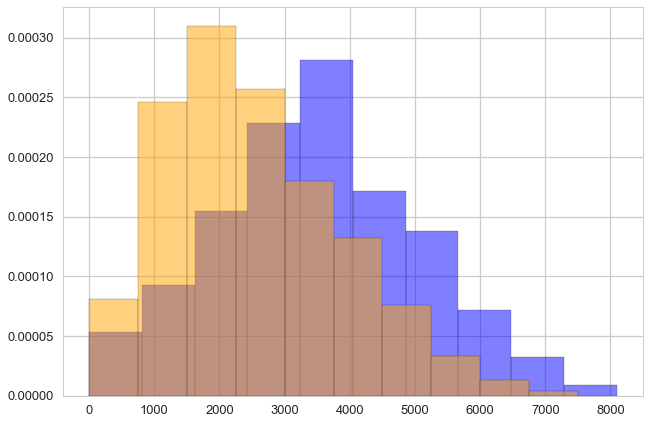

In [33]:
# Distance Dist
ASD_Dists = Cartesian_distancesDF.loc[ASD_STRs,ASD_STRs]
Sib_Dists = Cartesian_distancesDF.loc[Sib_STRs,Sib_STRs]
XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
fig, ax = plt.subplots()
ax.hist(ASD_Dists.values.flatten(), color="blue", density=1, alpha=0.5, edgecolor='black')
ax.hist(Sib_Dists.values.flatten(), color="orange", density=1, alpha=0.5, edgecolor='black')

(array([1.52492343e-04, 3.31895099e-04, 4.21596477e-04, 3.58805513e-04,
        2.51163859e-04, 9.86715160e-05, 6.27909647e-05, 9.86715160e-05,
        1.79402756e-05, 1.79402756e-05]),
 array([ 333.5416016 ,  885.42777669, 1437.31395178, 1989.20012686,
        2541.08630195, 3092.97247704, 3644.85865212, 4196.74482721,
        4748.6310023 , 5300.51717738, 5852.40335247]),
 <BarContainer object of 10 artists>)

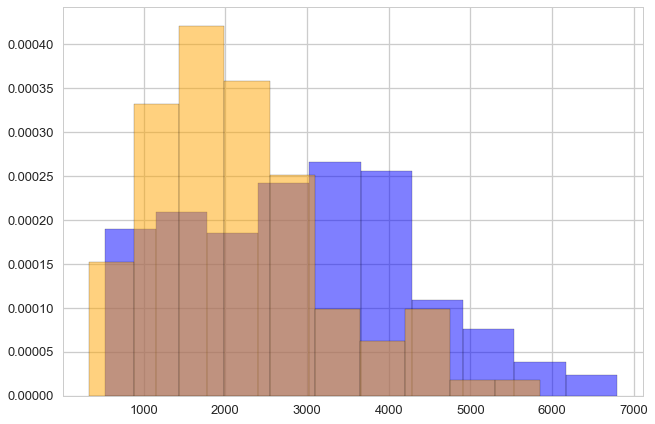

In [34]:
ASD_EdgeDists = Cartesian_distances_w_edge.loc[ASD_STRs,ASD_STRs]
Sib_EdgeDists = Cartesian_distances_w_edge.loc[Sib_STRs,Sib_STRs]
XX = [x for x in ASD_EdgeDists.values.flatten() if x > 0]
YY = [x for x in Sib_EdgeDists.values.flatten() if x > 0]
fig, ax = plt.subplots()
ax.hist(XX, color="blue", density=1, alpha=0.5, edgecolor='black')
ax.hist(YY, color="orange", density=1, alpha=0.5, edgecolor='black')


In [35]:
ZZ_ = [x for x in Cartesian_distancesDF.values.flatten() if x > 0]
ZZ = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]

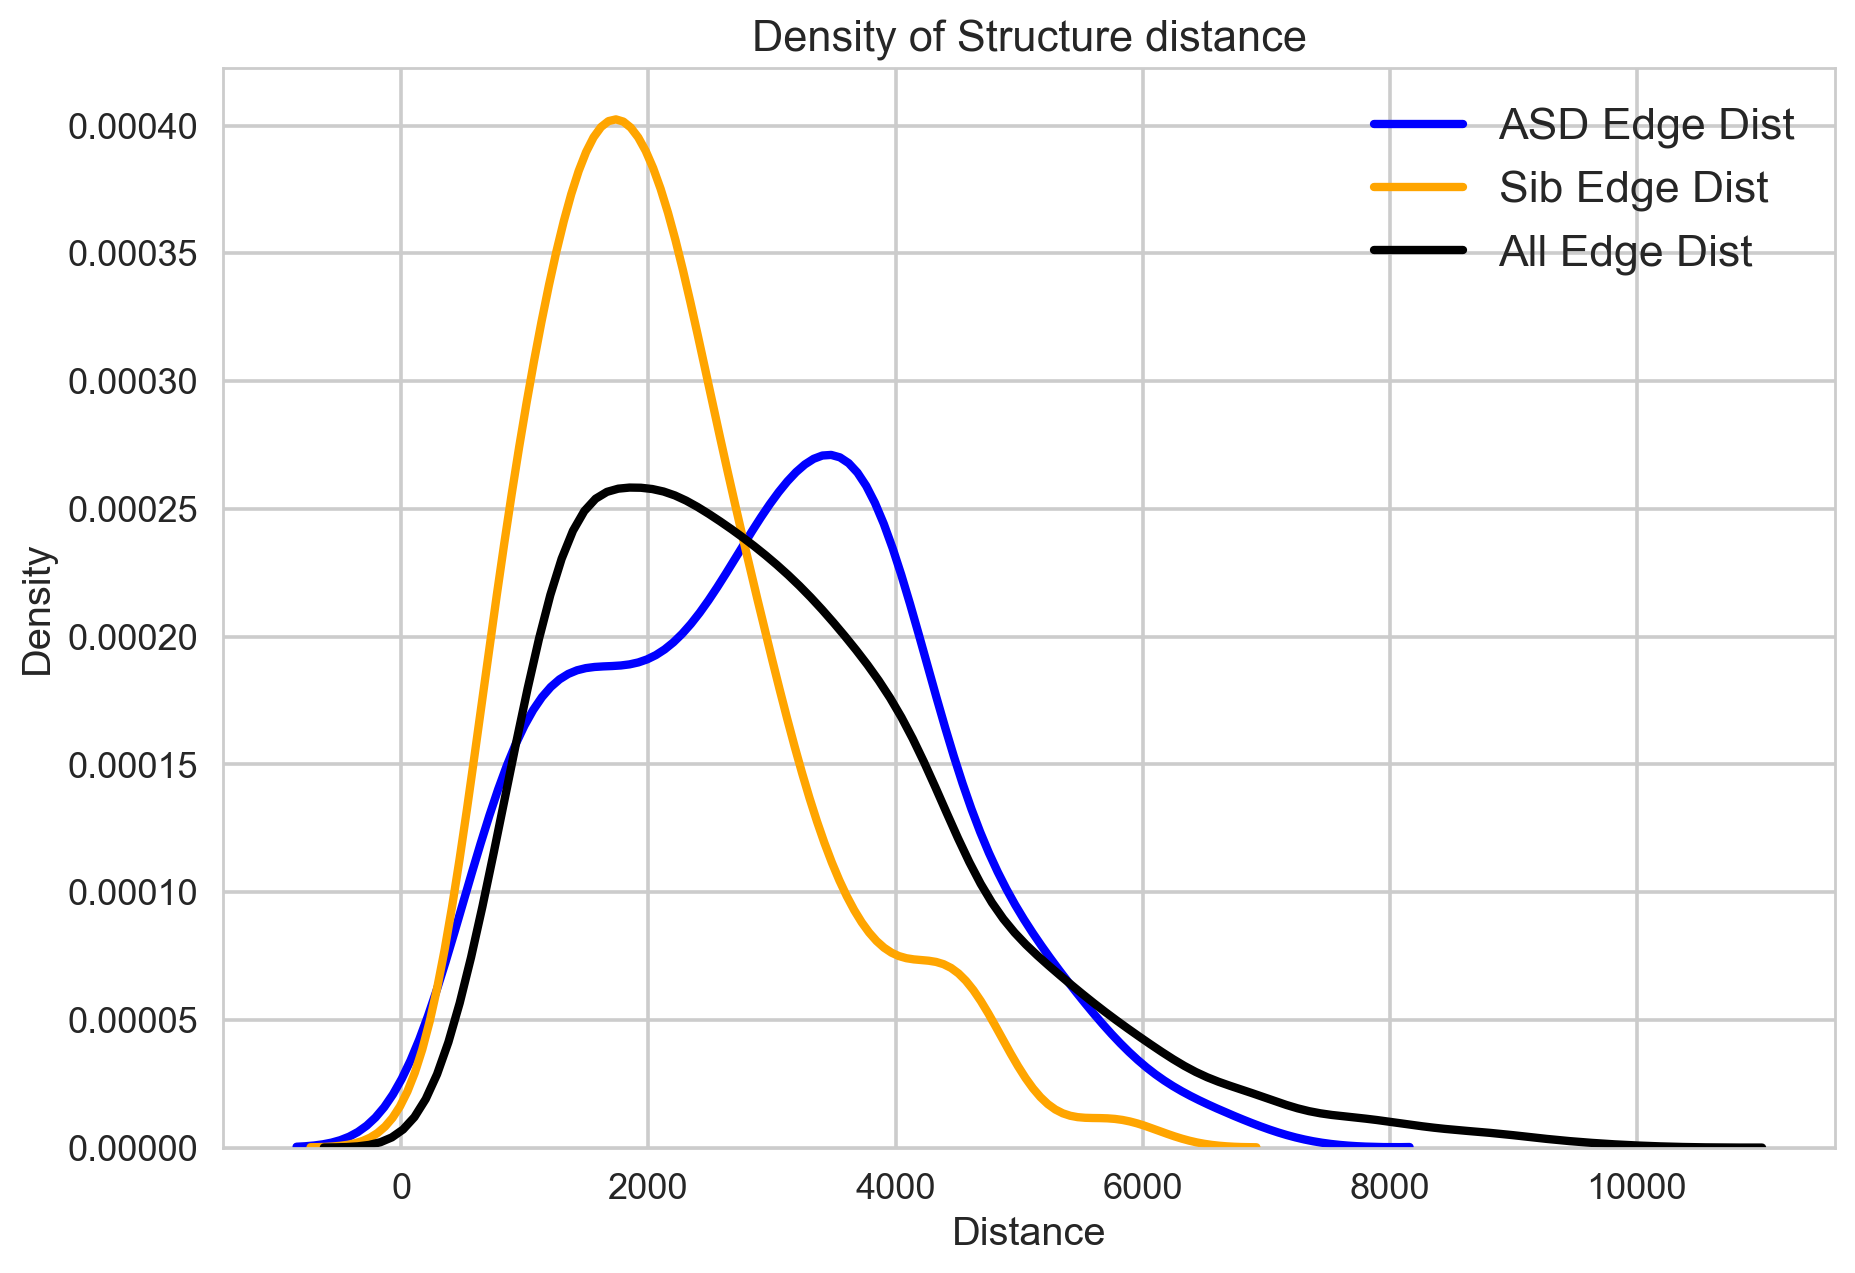

In [36]:
import seaborn as sns
fig, ax = plt.subplots(dpi=200)
#sns.distplot(XX_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "ASD STR Dist", color="blue")
sns.distplot(XX, hist = False, kde = True, kde_kws = {'linewidth': 3, }, label = "ASD Edge Dist", color="blue")
#sns.distplot(YY_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "Sib STR Dist", color="orange")
sns.distplot(YY, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Sib Edge Dist", color="orange")

#sns.distplot(ZZ_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "All STR Dist", color="black")
sns.distplot(ZZ, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "All Edge Dist", color="black")
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density of Structure distance')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.savefig("figs/Density_Str_edge_distance.pdf")

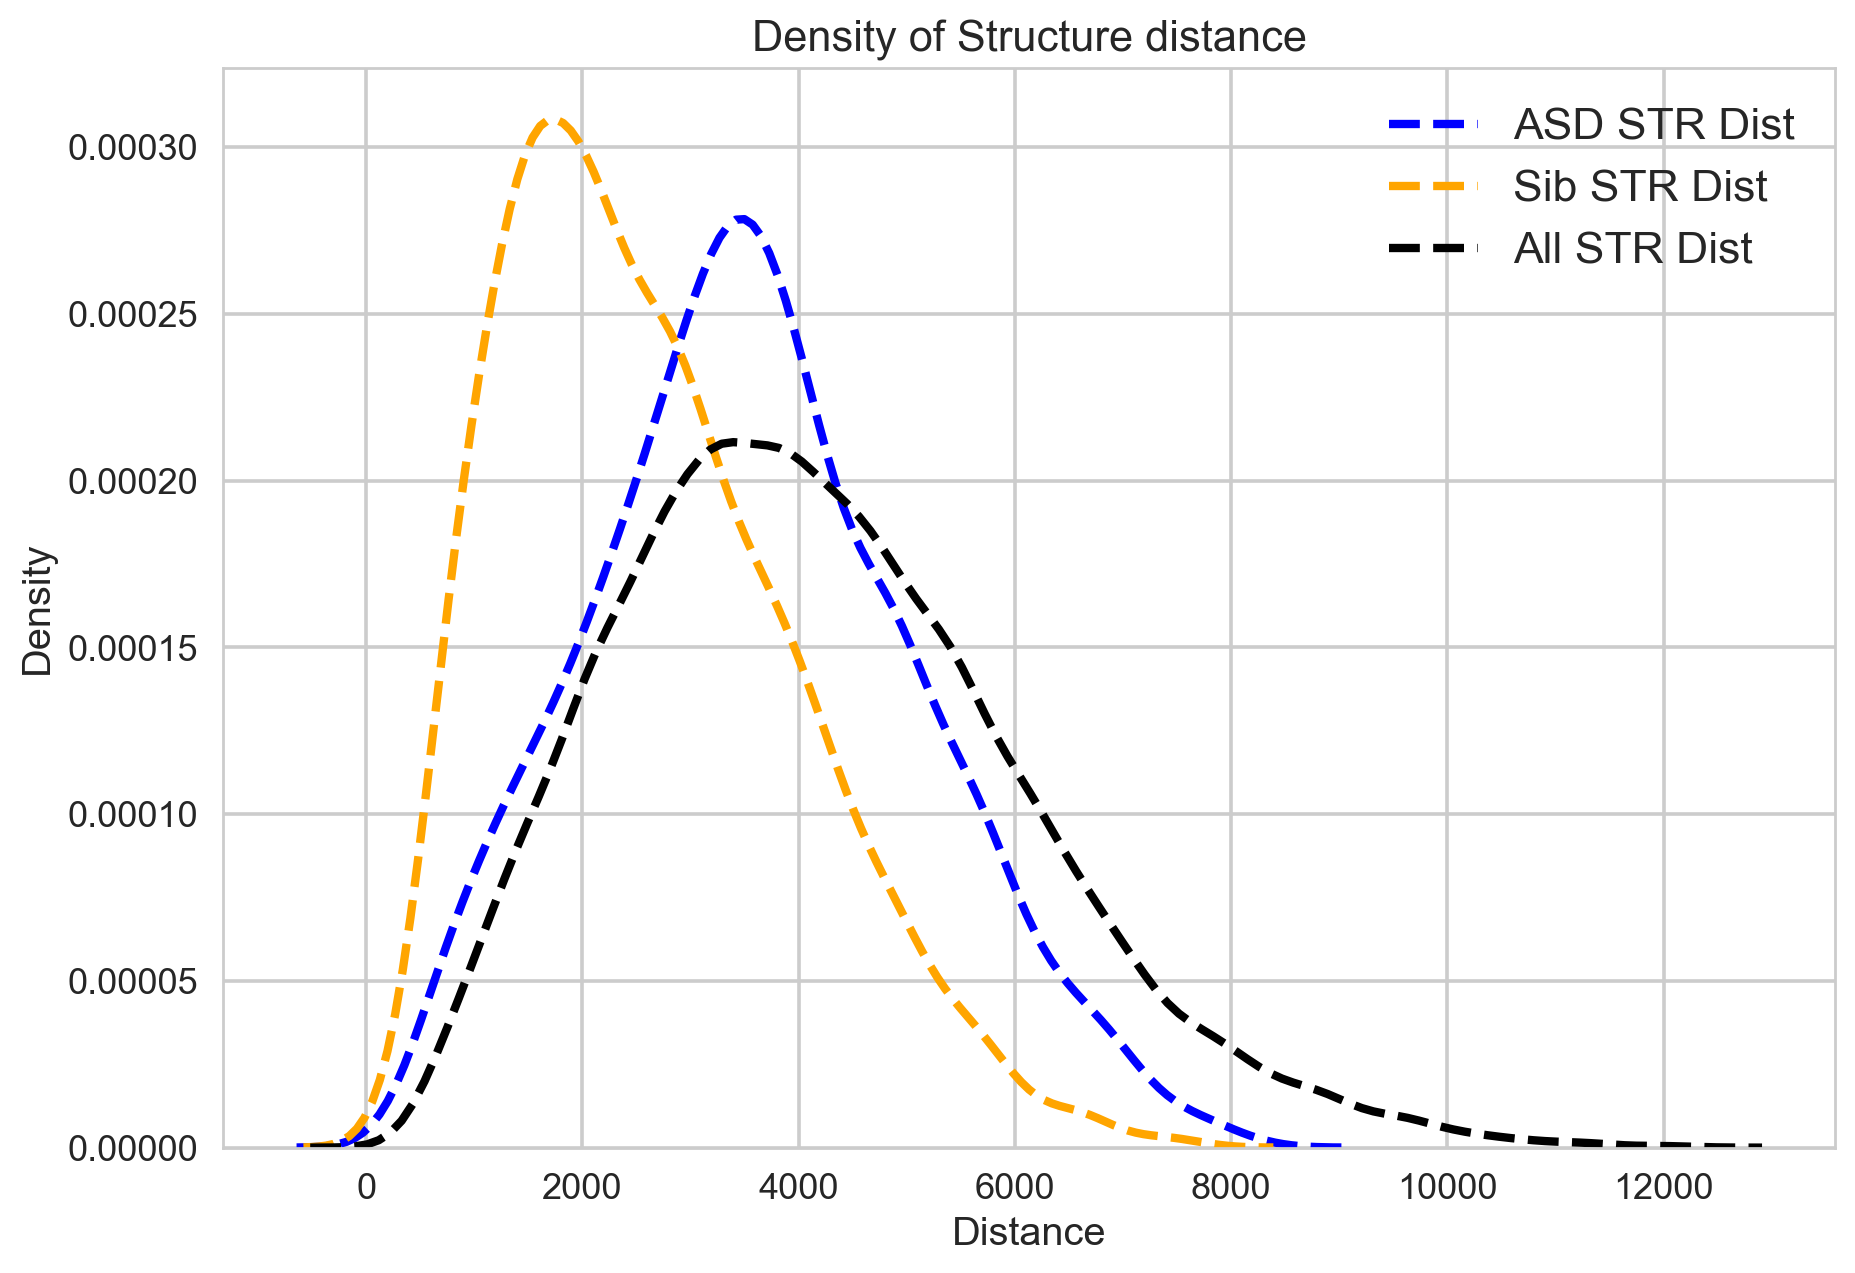

In [37]:
import seaborn as sns
fig, ax = plt.subplots(dpi=200)
sns.distplot(XX_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "ASD STR Dist", color="blue")
#sns.distplot(XX, hist = False, kde = True, kde_kws = {'linewidth': 3, }, label = "ASD Edge Dist", color="blue")
sns.distplot(YY_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "Sib STR Dist", color="orange")
#sns.distplot(YY, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "Sib Edge Dist", color="orange")

sns.distplot(ZZ_, hist = False, kde = True, kde_kws = {'linewidth': 3, 'linestyle':"--"}, label = "All STR Dist", color="black")
#sns.distplot(ZZ, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = "All Edge Dist", color="black")
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density of Structure distance')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.savefig("figs/Density_Str_edge_distance.pdf")

In [39]:
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs_distance_mat = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    Dist_cut_graphs_distance_mat.append(distance_mat_new)
    
#ASD_STRs = SparkMetaBias.head(49).index.values
ASD_STRs = Circuit_STRs

#Sib_STRs = SibBias.head(50).index.values
ASD_top49_pairs, Sib_top49_pairs = [], []
N_pairs_total = []
for i, matttt in enumerate(Dist_cut_graphs_distance_mat):
    ASD_Dists = matttt.loc[ASD_STRs,ASD_STRs]
    Sib_Dists = matttt.loc[Sib_STRs,Sib_STRs]
    XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
    YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
    ZZ_ = [x for x in matttt.values.flatten() if x > 0]
    ASD_top49_pairs.append(len(XX_)/len(ZZ_))
    Sib_top49_pairs.append(len(YY_)/len(ZZ_))
ASD_top49_pairs = np.array(ASD_top49_pairs)
Sib_top49_pairs = np.array(Sib_top49_pairs)
N_pairs_total = np.array(N_pairs_total)


In [40]:
print(ASD_top49_conn, Sib_top49_conn)

[31 64 75 95 49 17  5] [27 75 65 20 13  2  0]


In [41]:
print(np.sum(ASD_top49_conn), np.sum(Sib_top49_conn))

336 202


In [42]:
g2_asd_49 = subgraph(g, ASD_STRs)
g2_sib_49 = subgraph(g, Sib_STRs)
bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)

ValueError: operands could not be broadcast together with shapes (7,) (6,) 

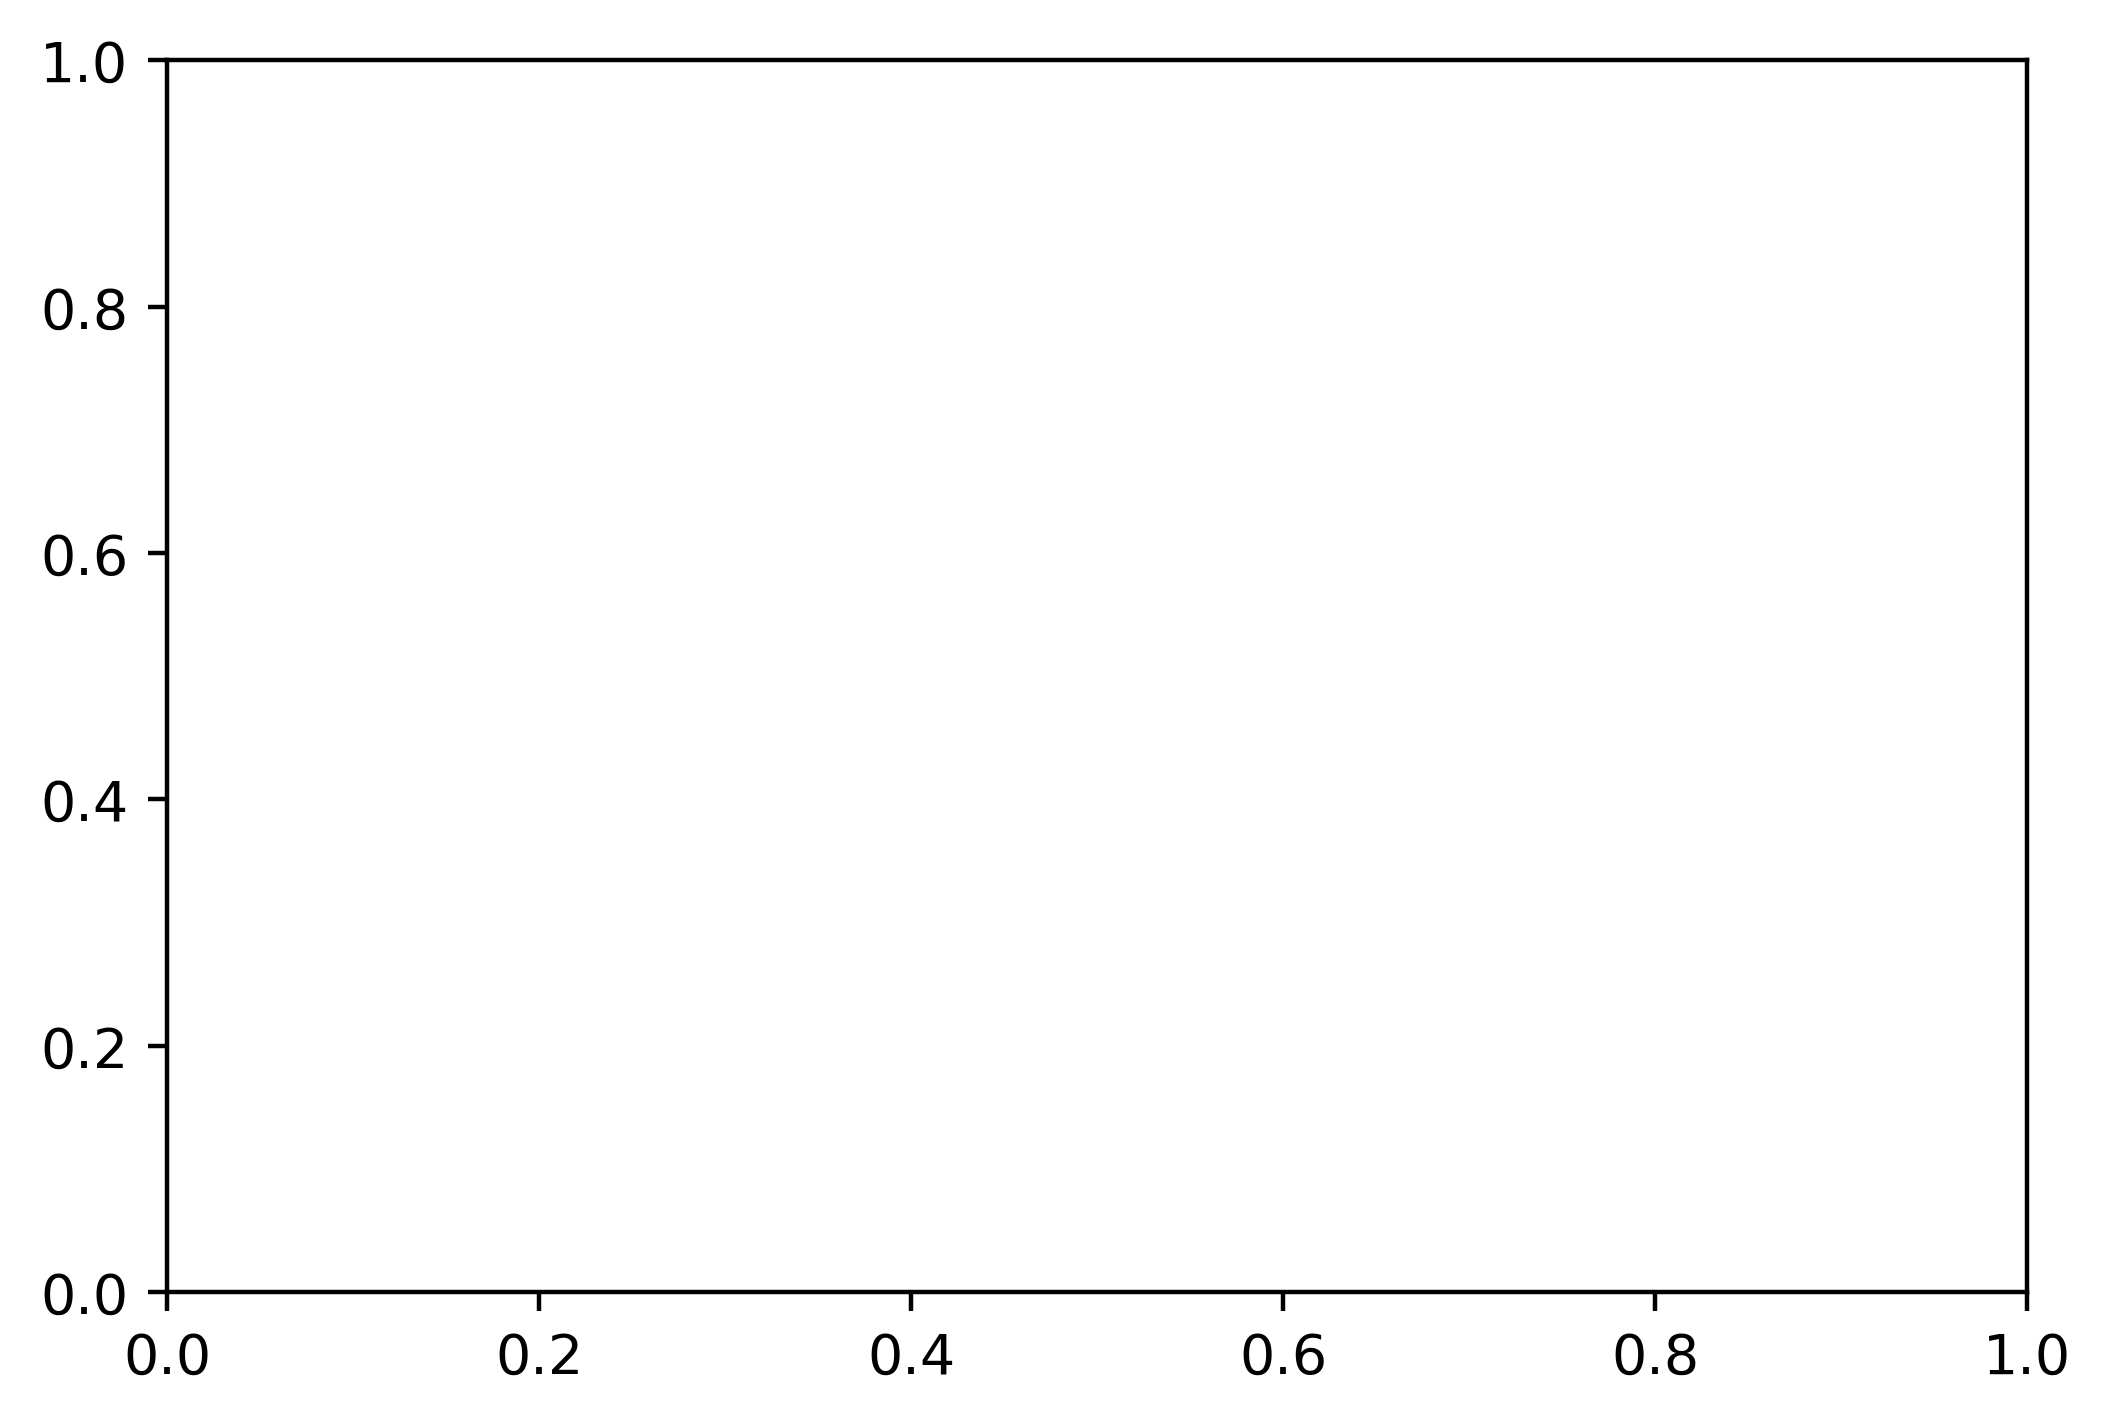

In [43]:
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.ticker as mticker  
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))
dat_asd = ASD_top49_conn/N_Connections_total
dat_sib = Sib_top49_conn/N_Connections_total
ax1.plot(np.arange(7), dat_asd/bl_asd, marker=".", label="Proband", color="blue")
ax1.plot(np.arange(7), dat_sib/bl_sib, marker=".", label="Sibings", color="green")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range (k um)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
fig.savefig("figs/Fig_4.A.pdf")

In [44]:
# Add bootstrapped error bars

def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    N_Connections_total = np.array(N_Connections_total)
    return ASD_top49_conn, Sib_top49_conn, N_Connections_total


Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs = []
#for i in range(10):
N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)


Nboot = 1000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    g2_asd_49 = subgraph(g, ASD_STR_boot)
    g2_sib_49 = subgraph(g, Sib_STR_boot)
    bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
    bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)
    ASD_top49_conn, Sib_top49_conn, N_Connections_total = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    dat_asd = ASD_top49_conn/N_Connections_total
    dat_sib = Sib_top49_conn/N_Connections_total
    #Dat_ASD_boots.append(dat_asd/bl_asd)
    Dat_ASD_boots.append(dat_asd)
    #Dat_Sib_boots.append(dat_sib/bl_sib)
    Dat_Sib_boots.append(dat_sib)

Dat_ASD_boots = np.array(Dat_ASD_boots)
Dat_Sib_boots = np.array(Dat_Sib_boots)

In [46]:
ASD_STRs = Circuit_STRs
#Sib_STRs = SibBias.head(50).index.values
ASD_top49_conn, Sib_top49_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
    Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
ASD_top49_conn = np.array(ASD_top49_conn)
Sib_top49_conn = np.array(Sib_top49_conn)
N_Connections_total = np.array(N_Connections_total)


g2_asd_49 = subgraph(g, ASD_STRs)
g2_sib_49 = subgraph(g, Sib_STRs)
bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)

dat_asd = ASD_top49_conn/N_Connections_total
dat_sib = Sib_top49_conn/N_Connections_total

#real_asd_dat = dat_asd/bl_asd
#real_sib_dat = dat_sib/bl_sib
real_asd_dat = dat_asd
real_sib_dat = dat_sib

In [47]:
print(ASD_top49_conn, Sib_top49_conn)

[31 64 75 95 49 22] [27 75 65 20 13  2]


In [48]:
Dat_ASD_boots = np.array(Dat_ASD_boots)
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    boots.sort()
    low, up = real_asd_dat[i] - boots[50], boots[950] - real_asd_dat[i]
    #low, up = boots[50], boots[950]
    ASD_Dy.append((low, up))
    
    boots = Dat_Sib_boots[:, i]
    boots.sort()
    low, up = boots[50], boots[950]
    Sib_Dy.append((low, up))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [49]:
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = Dat_Sib_boots[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [50]:
# Add Matched
XXX = []
for i in range(1000):
    df = pd.read_csv("dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv".format(i), index_col="STR")
    top50 = df.head(50).index.values
    Match_top49_conn = []

    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        Match_top49_conn.append(len(subgraph(g_, top50).es))
    Match_top49_conn = np.array(Match_top49_conn)
    N_Connections_total = np.array(N_Connections_total)

    g2_match_49 = subgraph(g, top50)
    bl_match = len(g2_match_49.es)/np.count_nonzero(adj_mat)

    dat_match = Match_top49_conn/N_Connections_total
    XXX.append(dat_match)
XXX = np.array(XXX)

FileNotFoundError: [Errno 2] No such file or directory: 'dat/cont.bias/ASD.MetaMatch.Spec.bias.0.csv'

In [ ]:
XXX.shape
match_mean = XXX.mean(axis=0)
match_mean.shape
Match_Dy = XXX.std(axis=0)
Match_Dy.shape

In [51]:
# Random STRs 
All_STRs = Cartesian_distancesDF.index.values
Rand_STRs = np.random.choice(All_STRs, size=(50, 1000))

In [52]:
Rand_Data = []
for i in range(1000):
    STRs = Rand_STRs[:, i]
    #print(STRs.shape)
    rand_top50_conn = []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        rand_top50_conn.append(len(subgraph(g_, STRs).es))
    rand_top50_conn = np.array(rand_top50_conn)
    N_Connections_total = np.array(N_Connections_total)
    
    dat_one_rand = rand_top50_conn/N_Connections_total
    Rand_Data.append(dat_one_rand)
Rand_Data = np.array(Rand_Data)

In [53]:
rand_mean = Rand_Data.mean(axis=0)
Rand_Dy = Rand_Data.std(axis=0)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  del sys.path[0]
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


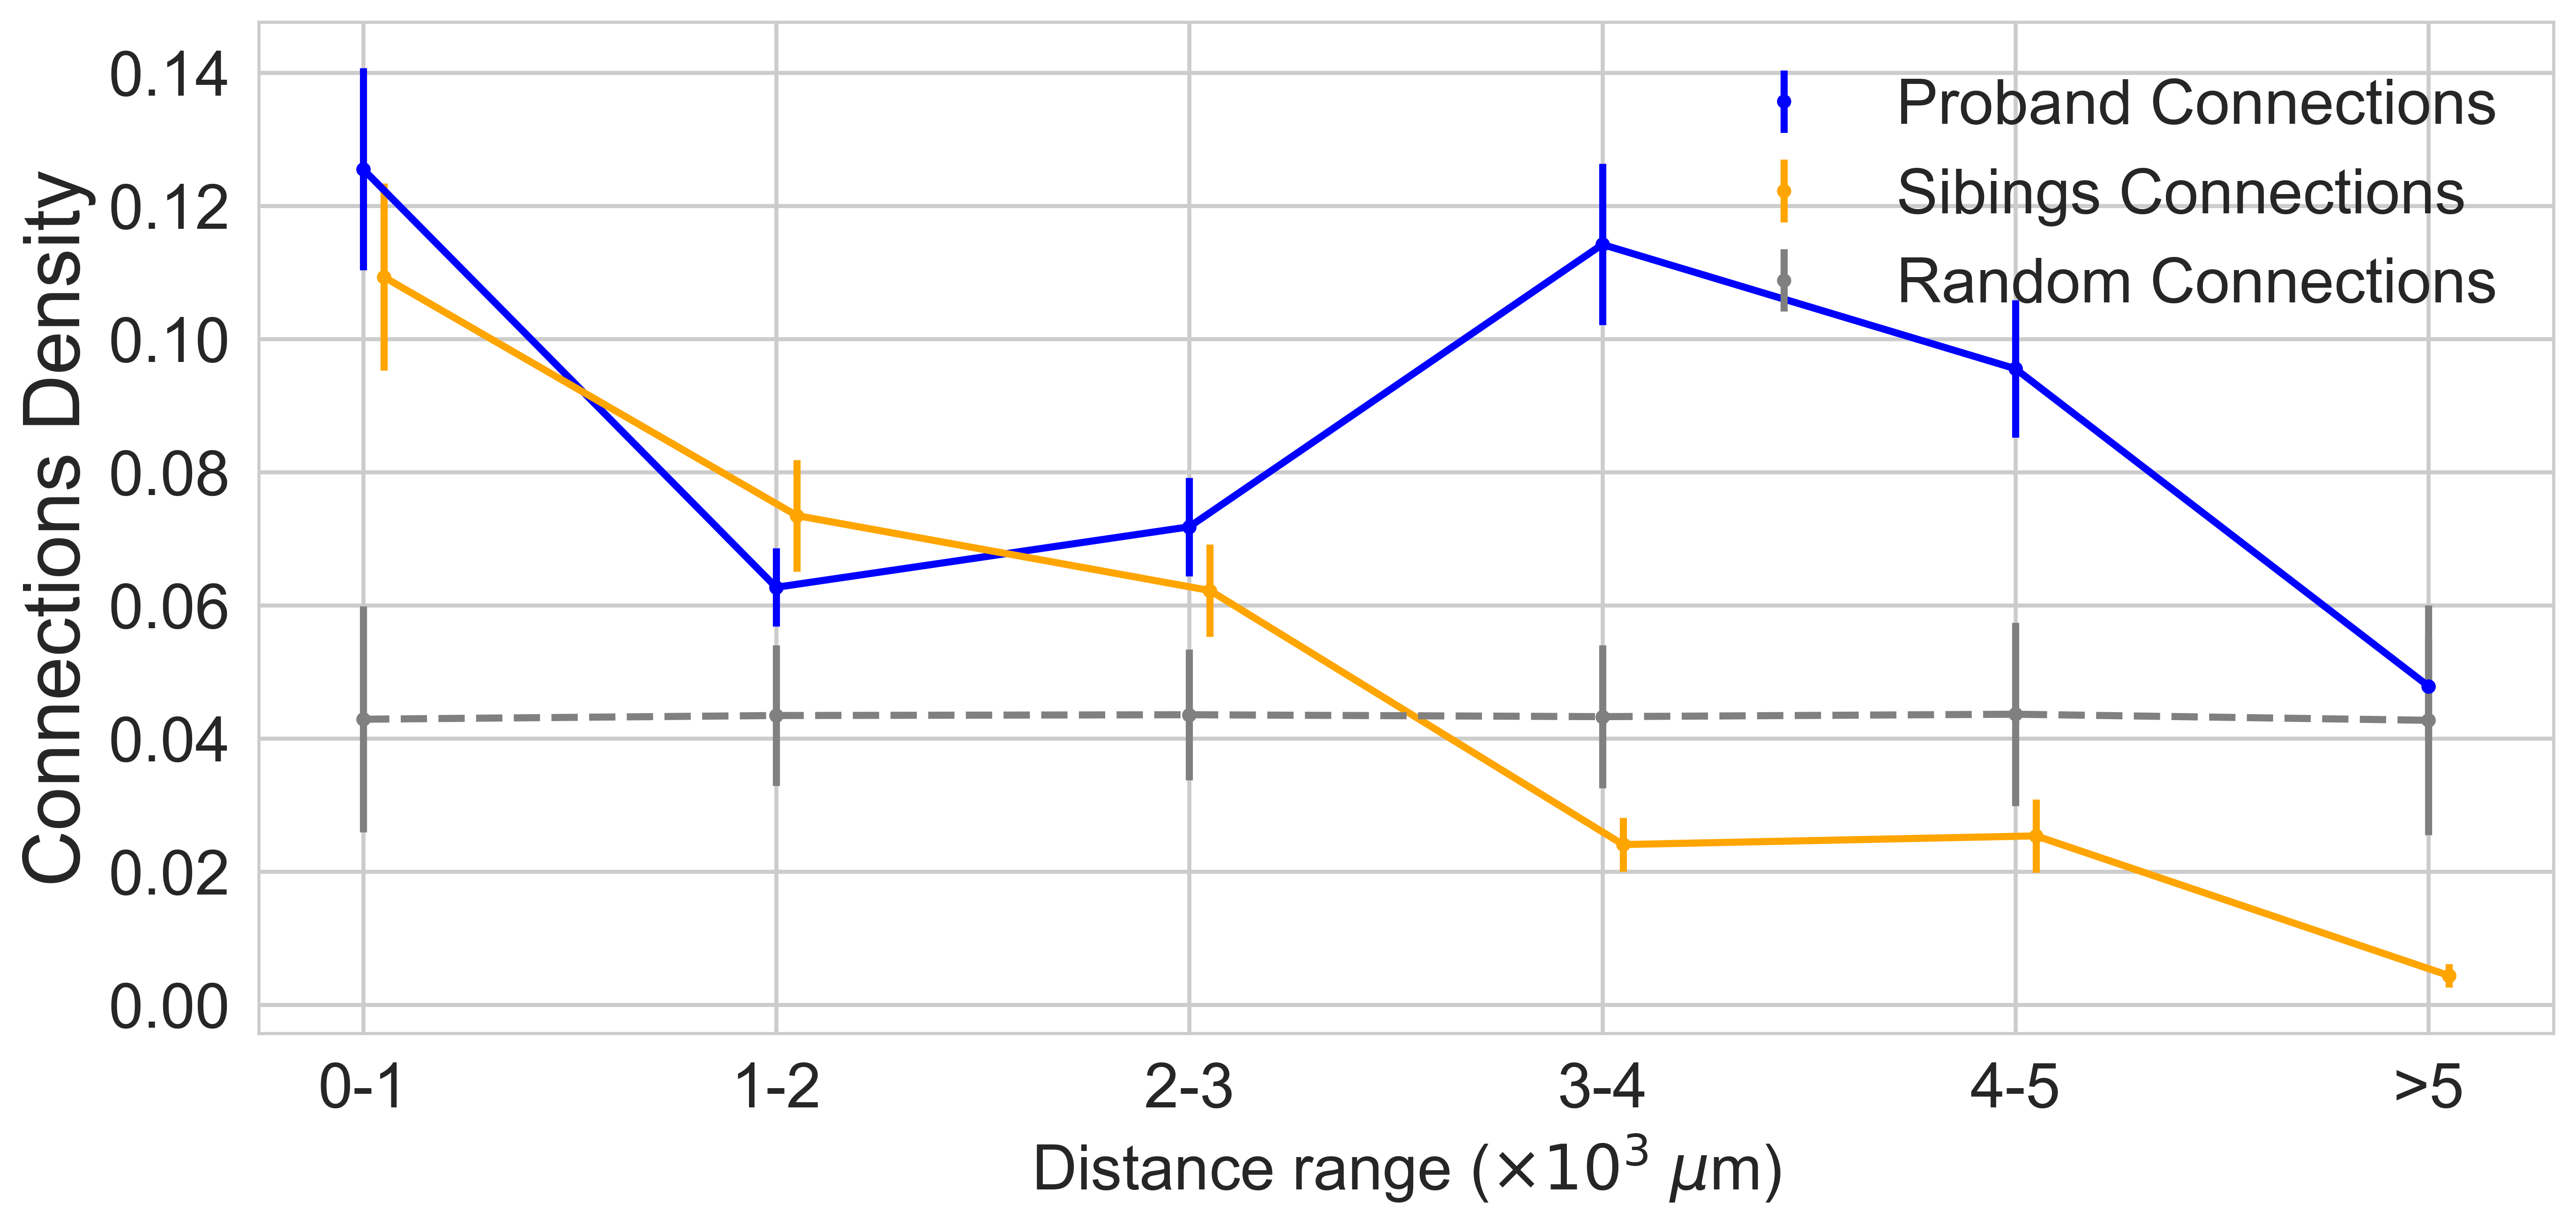

In [65]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax1 = plt.subplots(dpi=480, figsize=(12,6))

ax1.errorbar(np.arange(6), real_asd_dat, yerr=ASD_Dy, fmt=".", 
             label="Proband Connections", color="blue")
ax1.errorbar(np.arange(6) + 0.05, real_sib_dat, yerr=Sib_Dy, fmt=".k", 
             label="Sibings Connections", color="orange")
ax1.errorbar(np.arange(6) , rand_mean, yerr=Rand_Dy, fmt=".k", 
             label="Random Connections", color="gray")
ax1.plot(np.arange(6), real_asd_dat, marker="." , color="blue")
ax1.plot(np.arange(6) + 0.05, real_sib_dat, marker=".", color="orange")
ax1.plot(np.arange(6)  , rand_mean, marker=".", color="gray", ls="dashed")


ax1.grid(True)
ax1.legend(loc="upper right", fontsize=20)
ax1.set_ylabel("Connections Density", fontsize=25)
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
fig.savefig("figs/Fig_4.A.pdf")

In [ ]:
sum(real_asd_dat)

In [ ]:
sum(ASD_top49_pairs)

In [ ]:
ASD_top49_pairs

In [ ]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))

ax1.plot(np.arange(6), real_asd_dat/ASD_top49_pairs, marker=".", 
         label="Proband STR Pairs", color="blue", ls="dashed")
ax1.plot(np.arange(6) + 0.05, real_sib_dat/Sib_top49_pairs, marker=".", 
         label="Sibings STR pairs", color="orange", ls="dashed")

#ax1.plot(np.arange(6) + 0.1, match_mean, marker=".", color="red")
#ax1.axhline(y=1, ls="--", color="grey")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
fig.savefig("figs/Sup.Fig.X.pdf")

In [ ]:
import matplotlib.ticker as mticker  
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1 = plt.subplots(dpi=400, figsize=(6,4))
ax1.plot(np.arange(7), ASD_top49_pairs, marker=".", label="Proband", color="blue")
ax1.plot(np.arange(7), Sib_top49_pairs, marker=".", label="Sibings", color="green")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range (k um)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-"])
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))

#### Fig 4A New

In [ ]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

In [ ]:
#Circuit_STRs = pd.read_csv("dat/Circuit_GN_42.csv")["STR"].values
Circuit_STRs = pd.read_csv("dat/bias2/ASD.EW.Spec.bias.csv").head(50)["STR"].values

In [141]:
# Variables
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000] # 6 intervals
N_conn_asd_binX = []
N_conn_sib_binX = []
N_conn_all_binX = []
N_pair_asd_binX = []
N_pair_sib_binX = []
N_pair_all_binX = []

N_conn_asd_binX_bs = []
N_conn_sib_binX_bs = []
N_pair_sib_binX_bs = []
N_pair_all_binX_bs = []

In [142]:
# Calculate conns at each distance bin
Dist_cut_graphs_distance_mat = []
Dist_cut_graphs = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, 
                     keep="bw", cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    Dist_cut_graphs_distance_mat.append(Conn_mat_new)
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)
    
ASD_STRs = Circuit_STRs
Sib_STRs = SibBias.head(50).index.values
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_conn_all_binX.append(len(g_.es))
    N_conn_asd_binX.append(len(subgraph(g_, ASD_STRs).es))
    N_conn_sib_binX.append(len(subgraph(g_, Sib_STRs).es))

N_conn_asd_binX = np.array(N_conn_asd_binX)
N_conn_sib_binX = np.array(N_conn_sib_binX)
N_conn_all_binX = np.array(N_conn_all_binX)
    

In [143]:
# Bootstrape the dist errors
def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    return ASD_top49_conn, Sib_top49_conn

Nboot = 10000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    ASD_top49_conn, Sib_top49_conn = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    N_conn_asd_binX_bs.append(ASD_top49_conn)
    N_conn_sib_binX_bs.append(Sib_top49_conn)

N_conn_asd_binX_bs = np.array(N_conn_asd_binX_bs)
N_conn_sib_binX_bs = np.array(N_conn_sib_binX_bs)
print(N_conn_asd_binX_bs.shape)

(10000, 6)


In [145]:
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = N_conn_asd_binX_bs[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = N_conn_sib_binX_bs[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [149]:
# Calculate Npairs at each distance bin
Dist_cut_graphs_distance_mat = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distancesDF, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    Dist_cut_graphs_distance_mat.append(distance_mat_new)
    
for i, matttt in enumerate(Dist_cut_graphs_distance_mat):
    ASD_Dists = matttt.loc[ASD_STRs,ASD_STRs]
    Sib_Dists = matttt.loc[Sib_STRs,Sib_STRs]
    XX_ = [x for x in ASD_Dists.values.flatten() if x > 0]
    YY_ = [x for x in Sib_Dists.values.flatten() if x > 0]
    ZZ_ = [x for x in matttt.values.flatten() if x > 0]
    N_pair_asd_binX.append(len(XX_))
    N_pair_sib_binX.append(len(YY_))
    N_pair_all_binX.append(len(ZZ_))
N_pair_asd_binX = np.array(N_pair_asd_binX)
N_pair_sib_binX = np.array(N_pair_sib_binX)
N_pair_all_binX = np.array(N_pair_all_binX)


/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


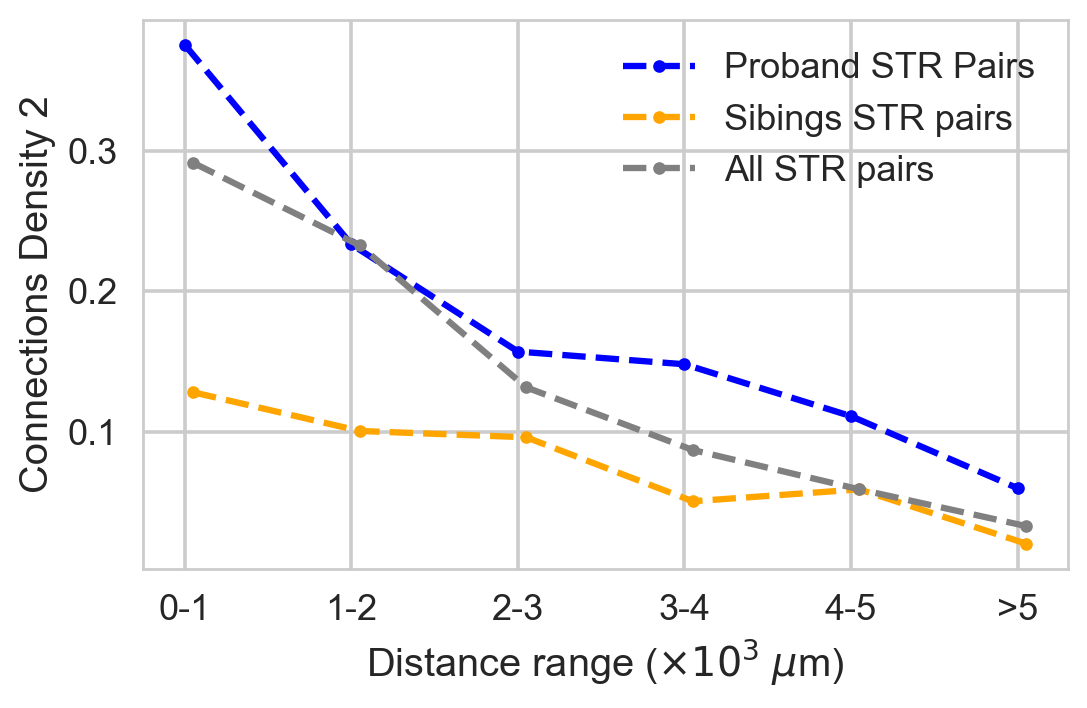

In [150]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=200, figsize=(6,4))

# Conn Normed Density
#ax1.errorbar(np.arange(6), N_conn_asd_binX/N_conn_all_binX, yerr=ASD_Dy/2/N_conn_all_binX, fmt=".", label="Proband Connections", color="blue")
#ax1.errorbar(np.arange(6) + 0.05, N_conn_sib_binX/N_conn_all_binX, yerr=Sib_Dy/2/N_conn_all_binX, fmt=".k", label="Sibings Connections", color="orange")
#ax1.plot(np.arange(6), N_conn_asd_binX/N_conn_all_binX, marker="." , color="blue")
#ax1.plot(np.arange(6) + 0.05, N_conn_sib_binX/N_conn_all_binX, marker=".", color="orange")

# Conn Density
ax1.plot(np.arange(6), N_conn_asd_binX/N_pair_asd_binX, marker=".", label="Proband STR Pairs", color="blue", ls="dashed")
ax1.plot(np.arange(6) + 0.05, N_conn_sib_binX/N_pair_sib_binX, marker=".", label="Sibings STR pairs", color="orange", ls="dashed")
ax1.plot(np.arange(6) + 0.05, N_conn_all_binX/N_pair_all_binX, marker=".", label="All STR pairs", color="grey", ls="dashed")

# Conn Enrichment 
#ax1.plot(np.arange(6), (N_conn_asd_binX/N_pair_asd_binX)/(N_conn_all_binX/N_pair_all_binX), 
#         marker=".", label="Proband STR Pairs", color="blue", ls="dashed")
#ax1.plot(np.arange(6) + 0.05, (N_conn_sib_binX/N_pair_sib_binX)/(N_conn_all_binX/N_pair_all_binX),
#         marker=".", label="Sibings STR pairs", color="orange", ls="dashed")

ax1.grid(True)
ax1.legend()
#ax1.set_title("(N edge/N pair)") # Conn Density
#ax1.set_title("(N edge/N pair)_selected / (N edge/N pair)_all") # Conn Normed Density
#ax1.set_title("(N edge select/N edge all)") # Conn Normed Density
#ax1.set_title("(N edge select/N edge all)") # Conn Normed Density
ax1.set_ylabel("Connections Density 2")
#ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
plt.tight_layout()
plt.savefig("figs/Dist.Conn.Density.2.pdf")
#plt.savefig("figs/Dist.Conn.Enrichment.pdf")


### Cohesiveness with Distance bins

In [225]:
Cohe_ASD, Cohe_Sib = [], []
for g_ in Dist_cut_graphs:
    #print(g_)
    Score_asd, _ = ScoreSTRSet(g_, ASD_STRs)
    Score_sib, _ = ScoreSTRSet(g_, Sib_STRs)
    #print(Score_asd, Score_sib)
    Cohe_ASD.append(Score_asd)
    Cohe_Sib.append(Score_sib)

In [237]:
def getratio_asd_sib_cohe(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        #ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        #Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
        Score_asd, _ = ScoreSTRSet(g_, ASD_STRs)
        Score_sib, _ = ScoreSTRSet(g_, Sib_STRs)
        ASD_top49_conn.append(Score_asd)
        Sib_top49_conn.append(Score_sib)
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    return ASD_top49_conn, Sib_top49_conn

Nboot = 1000
Dat_ASD_boots, Dat_Sib_boots = [], []
ASD_Boot_Dir = "dat/Bootstrap_Match/asd.boot.bias.z2/"
Sib_Boot_Dir = "dat/Bootstrap_Match/Sib.boot.Z2.bias/"
N_cohe_asd_binX_bs, N_cohe_sib_binX_bs = [], []
for i in range(1, Nboot, 1):
    #ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    #Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    ASD_STR_boot = pd.read_csv(ASD_Boot_Dir+"bootstrap.{}.csv".format(i), 
                               index_col="STR").index.values[:50]
    Sib_STR_boot = pd.read_csv(Sib_Boot_Dir+"bootstrap.{}.csv".format(i), 
                               index_col="STR").index.values[:50]
    ASD_top49_conn, Sib_top49_conn = getratio_asd_sib_cohe(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    N_cohe_asd_binX_bs.append(ASD_top49_conn)
    N_cohe_sib_binX_bs.append(Sib_top49_conn)

N_cohe_asd_binX_bs = np.array(N_cohe_asd_binX_bs)
N_cohe_sib_binX_bs = np.array(N_cohe_sib_binX_bs)
print(N_cohe_asd_binX_bs.shape)

(999, 6)


In [238]:
ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = N_cohe_asd_binX_bs[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = N_cohe_sib_binX_bs[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

In [246]:
# Add Matched
XXX = []
for i in range(1, 1000, 1):
    df = pd.read_csv("dat/Bootstrap_Match/asd.cont.bias.z2/cont.bias.{}.csv".format(i),
                     index_col="STR")
    top50 = df.head(50).index.values
    match_cohe = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        cohe, _ = ScoreSTRSet(g_, top50)
        match_cohe.append(cohe)
    match_cohe = np.array(match_cohe)
    XXX.append(match_cohe)
XXX = np.array(XXX)

match_mean = XXX.mean(axis=0)
match_mean.shape
Match_Dy = XXX.std(axis=0)
Match_Dy.shape

(6,)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


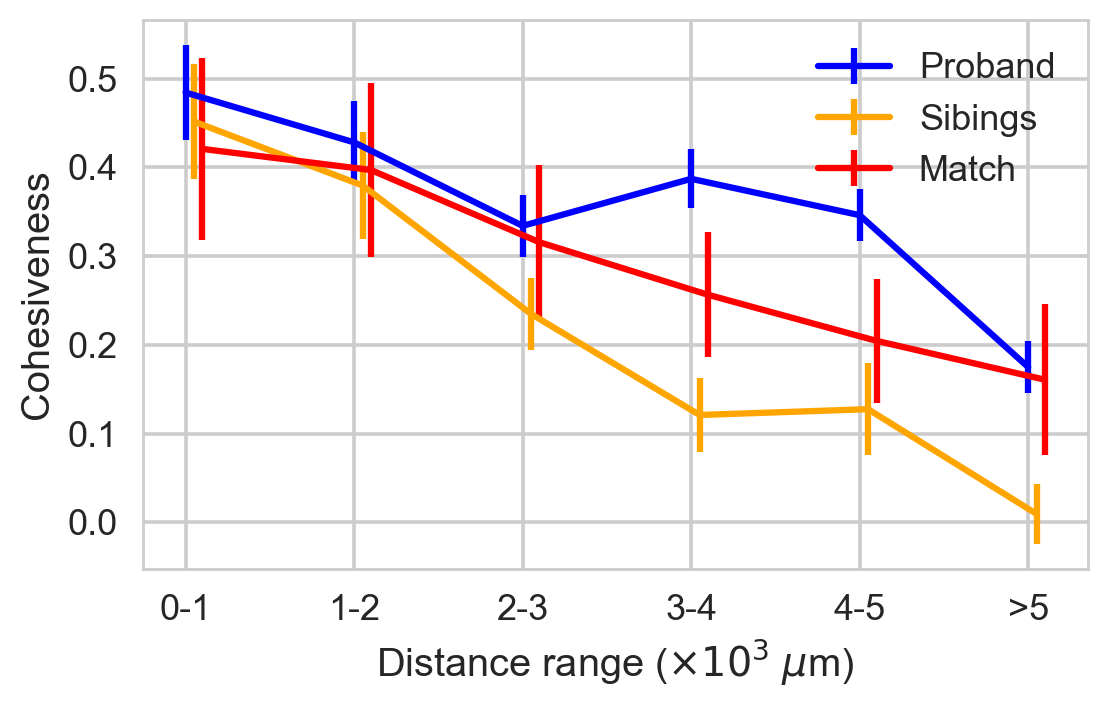

In [248]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(dpi=200, figsize=(6,4))


ax1.errorbar(np.arange(6), Cohe_ASD, yerr=ASD_Dy, 
             label="Proband", color="blue")
ax1.errorbar(np.arange(6) + 0.05, Cohe_Sib, yerr=Sib_Dy, 
             label="Sibings", color="orange")

ax1.errorbar(np.arange(6) + 0.1, match_mean, yerr=Match_Dy, 
             label="Match", color="red")

ax1.grid(True)
ax1.legend()

ax1.set_ylabel("Cohesiveness")
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)")
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"])
plt.tight_layout()
plt.savefig("figs/Dist.Cohesive.pdf")

## Table